<a href="https://colab.research.google.com/github/Pogayo/Machine-Learning/blob/master/Advertising_Vs_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0) # reading the Comma Separated values into a dataframe.Add the index col parameter as the csv data is already indexed by the first column
print(data.shape)
data.head(4)

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5


In [6]:
#For this dataset.. the features are TV, radio and newspaper while the response is sales
#Because the response values are continous, this is a regression problem
#There are 200 observations
data.describe()  #getting the statistical summary


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


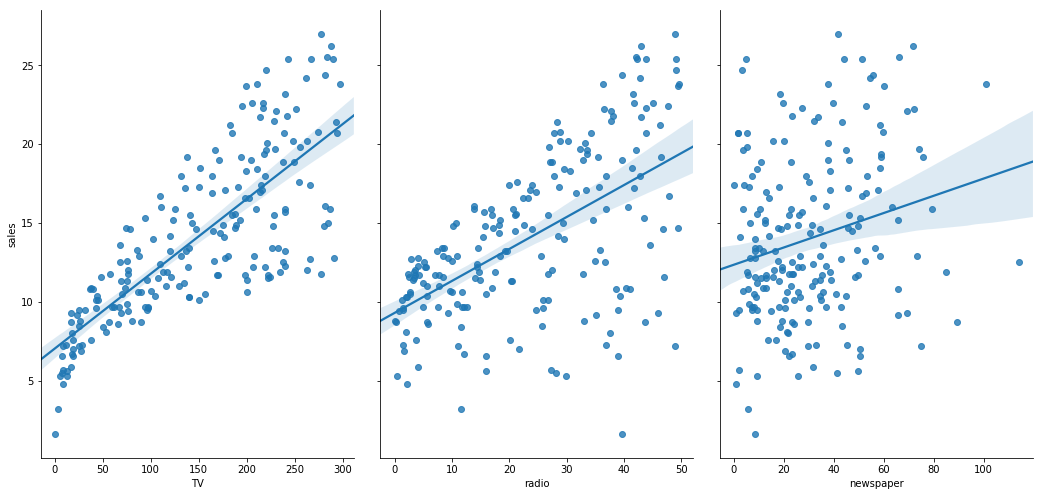

In [11]:
#next step is visualizing using seaborn(It is the first time I am using it-It is a library for statistical data visualization built on top of Matplotlib)
import seaborn as sb
# to allow plots to appear within the notebook
%matplotlib inline 
#I am going to visualize the relationship between the features and the respinse using scatterplots
sb.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',height=7,aspect=0.7,kind='reg') #the height parameter used to be size


In [20]:
#Preparing the training and test data, will use the train_test_split function
X=data[['TV','radio','newspaper']]
Y=data.sales #can do this because it is a series
X.head() #default for head() is 5
Y.head(2)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=2) #default for test is 25%
X_train.shape


(150, 3)

In [26]:
from sklearn.linear_model import LinearRegression

#instantiating
linreg=LinearRegression()
#fittimg
linreg.fit(X_train,Y_train)
print("intercept:"+str(linreg.intercept_))
print("coefficients:"+str(linreg.coef_))
#using the zip function to map the coefficients
list(zip(['TV','radio','newspaper'],linreg.coef_))

intercept:3.189486918009912
coefficients:[0.04535562 0.18319738 0.00453019]


[('TV', 0.04535561991742507),
 ('radio', 0.1831973844899806),
 ('newspaper', 0.004530192045904241)]

In [28]:
#Now that our model has learnt, let us make predictions
y_pred=linreg.predict(X_test)
print(y_pred)

[13.99058152  9.50758367  6.91724455 15.33143648 18.46540316 15.62065818
  7.35966887 20.452523   13.24634355 17.16398154 10.99771852 19.46779909
  9.03657736 10.89886673 13.95879341 12.69230584  9.23224307 17.89193155
 16.51836403 18.68215173 16.75890177 15.84300898 11.91276879 12.23170893
 14.83241118 12.1860612  15.39589817  8.02683754 16.61485902 13.8594905
 16.26810648 17.1073793  12.82389305 12.95951332  8.95459287 10.93286367
 22.17249844 20.08034682 15.94386799 20.20106455 21.16817697 17.38031794
 21.21854132 15.16756761 19.72623794 18.80254043 17.51154272 10.51526495
  9.69138443 12.88219732]


In [32]:
#Now that we have predicted, we need to measure our accuracy: There are 3 main methods for evaluation linear regression models
# 1>Mean Absolute Error (MAE) 2>Mean squared Error 3>Root mean squared error. I will pick RMSE
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,y_pred))
print(metrics.mean_squared_error(Y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred))) #Doing RMSE using numpy functions

1.637310971688717
5.653366108811545
2.3776808256810975


In [33]:
# will remove the newspaper feature as it did not have a strong correlations and see how that impacts our predictions
X=data[['TV','radio']]
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,random_state=2)
linreg.fit(X_train,Y_train)
pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test,pred)))

2.3617541355424385
